In [1]:
# 01.- Importacion de librerias y constantes de calculo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
SIZE = 'Size_house'
PRICE = 'Price'

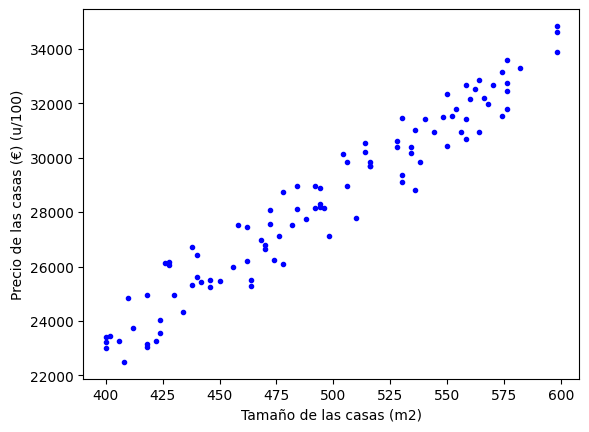

In [2]:
# 02.- Generacion y visualizacion del conjunto de datos aleatorios
np.random.seed(0)
size_house = 2 * np.random.randint(200, 300, 100)
price_house = 2 + 50 * size_house + np.random.randint(2000, 5000, 100)

plt.plot(size_house, price_house, 'b. ')
plt.xlabel('Tamaño de las casas (m2)')
plt.ylabel('Precio de las casas (€) (u/100)')
plt.show()

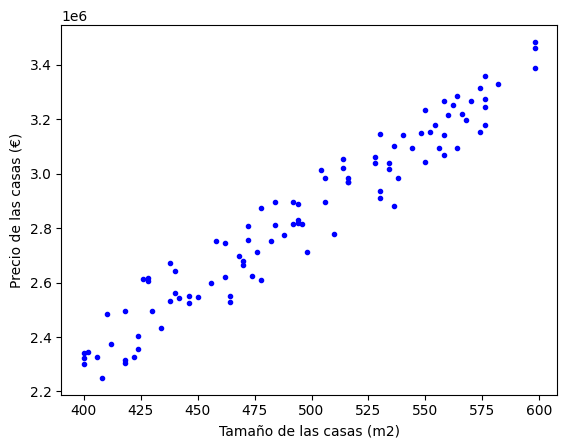

In [3]:
# 03.- Modificacion del conjunto de datos y visualizacion 
dct_data = {SIZE:size_house.flatten(), PRICE:price_house.flatten()}
df_data = pd.DataFrame(dct_data)
df_data[PRICE] = df_data[PRICE] * 100
df_data = df_data.astype({SIZE:int, PRICE:int})

plt.plot(df_data[SIZE], df_data[PRICE], 'b.')
plt.xlabel('Tamaño de las casas (m2)')
plt.ylabel('Precio de las casas (€)')
plt.show()

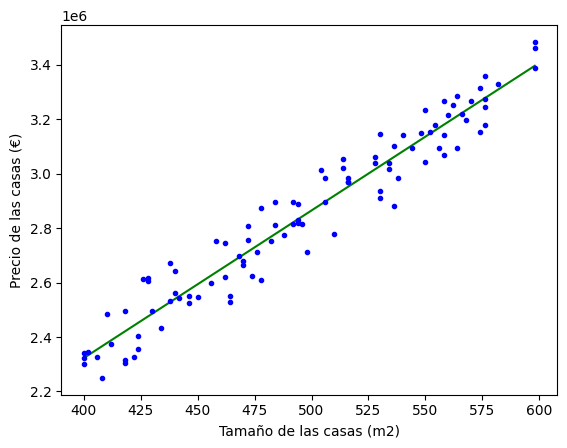

In [4]:
# 05.- Construccion del modelo
# Instanciamos el objeto Regresion Lineal
lin_reg = LinearRegression()

# Ahora con la funcion fit de la libreria Sklearn vamos a entrenar el algoritmo
# Recibira como parametros las variables de entrada y la variable de salida
lin_reg.fit(df_data[SIZE].values.reshape(-1, 1), df_data[PRICE].values)

# Almacenamos en variables los valores de la pendiente y del corte con el eje Y
# Siendo la ecuacion de la regresion lineal h(x) = θx + θ
theta_0 = lin_reg.intercept_
theta_1 = lin_reg.coef_

# Una vez representados los parametros vamos a realizar una prediccion en funcion del valor
# min y max del conjunto de datos de entrenamiento
value_min_max = np.array([[df_data[SIZE].min()],[df_data[SIZE].max()]])
value_train = lin_reg.predict(value_min_max)

# Ahora con los valores min/max y la prediccion realizadas generamos la visualizacion de los datos
# En esta visualizacion la linea verde sera la funcion hipotesis ajustada al modelo que se ha generado
# entrenando el algoritmo con el conjunto de datos
plt.plot(value_min_max, value_train, 'g-')
plt.plot(df_data[SIZE], df_data[PRICE], 'b.')
plt.xlabel('Tamaño de las casas (m2)')
plt.ylabel('Precio de las casas (€)')
plt.show()

El precio de una casa con 490m2 sera de 2810643.82€


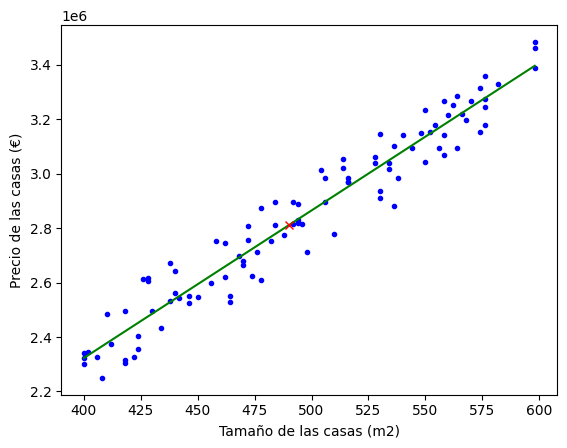

In [5]:
# 06.- Prediccion y representacion de un nuevo ejemplos
price_house_check = np.array([[490]])

# Aplicamos el modelo de entrenado mediante la funcion predict
predict_cost = lin_reg.predict(price_house_check)

# Impresion de comprobacion
print("El precio de una casa con {}m2 sera de {}€".format(
    price_house_check[0][0],
    round(predict_cost[0], 2))
    )

# Sobre los datos obtenidos de la prediccion sobre el valor nuevo y los datos de entrenamiento
# localizaremos la ubicacion del punto nuevo
plt.plot(df_data[SIZE], df_data[PRICE], 'b.')
plt.plot(value_min_max, value_train, 'g-')
plt.plot(price_house_check, predict_cost, 'rx')
plt.xlabel('Tamaño de las casas (m2)')
plt.ylabel('Precio de las casas (€)')
plt.show()